In [6]:
import matplotlib.pyplot as plt
import random as random
import networkx as nx
from scipy.optimize import curve_fit

In [11]:
#Deactivation model
N0 = 20 #Number of generation 0 nodes.
#Initial network: N0 nodes fully connected
actives = [] #List of active nodes
inactives = [] #List of inactive nodes
inlinks = [] #List of inlinks of each node
indegree = []
for i in range(0,N0):
    actives.append(i)
    inlink = [k for k in range(0,N0)] #List of outlinks|
    inlink.remove(i) #Remove itself from outlinks 
    inlinks.append(inlink)
    indegree.append(len(inlink))

In [12]:
max_step = 10000
a = N0 #Parameter of the system dynamics
for step in range(0,max_step):
    for i in actives: 
        inlinks[i] =  inlinks[i] + [N0 + step] #Adds the new node to the list of in-links of the node i
        indegree[i] += 1
    inlinks.append([])
    indegree.append(0)
    
    #Deactivation step
    r = sum([(a + len(inlinks[i]))**(-1) for i in actives]) #Constant needed to calculate probability of deactivation
    p = [r**(-1)/(a+len(inlinks[i])) for i in actives] #To store probabilities of deactivation
    deactivated_node = random.choices(actives,p,k=1)[0]
    actives.remove(deactivated_node)
    inactives.append(deactivated_node)
    actives.append(N0 + step)

In [13]:
counted = [[x,indegree.count(x)] for x in set(indegree)]
k = [c[0] for c in counted]
n = [c[1] for c in counted]

In [5]:
def power_law(k,gamma,I):
    return I*(a+k)**(-gamma)

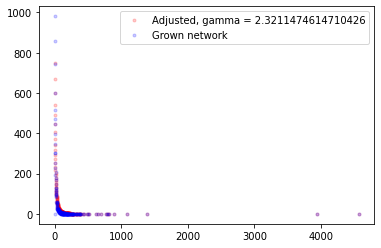

In [15]:
popt, pcov = curve_fit(power_law,k,n)
na = [power_law(i, popt[0],popt[1]) for i in k]
plt.plot(k,na,'.r',alpha = 0.2,label = 'Adjusted, gamma = ' + str(popt[0]))
plt.plot(k,n,'.b',alpha = 0.2, label = 'Grown network')
plt.legend(loc = 'best')
plt.show()

In [19]:
#Now that we have the net working, we can simulate a SIR model on top of it.
#To apply the SIR model, we make a list of susceptibles, infectious and recovered.
I0 = 6 #Initial number of infected people.
N = len(inlinks) #Population size
beta = 0.01 #Transmission rate
nu = 0.01 #Recovery rate
indexes = [i for i in range(0,N)]
I = random.sample(indexes, I0) #Picks I0 initial susceptibles at random and makes them infectious
R = []
S = indexes
for i in I:
    S.remove(i)
I_t = [I0]
R_t = [0]
S_t = [N-I0]

In [20]:
max_step = 100
S_f = []
I_f = []
R_f = []
inlinks2 = inlinks.copy()
for step in range(0,max_step):
    S_to_remove = []
    I_to_remove = []
    
    for i in I:
        if random.random() < nu:
            I_to_remove.append(i)

        for link in inlinks2[i]:
            if link in S and random.random() < beta:
               S_to_remove.append(link)
               #print(S_to_remove)

    S = [s for s in S if s not in S_to_remove]
    I = [i for i in I if i not in I_to_remove] + S_to_remove
    R = R + I_to_remove
    #aux = [[i for i in elem if i not in I_to_remove] for elem in inlinks2]
    #inlinks2 = aux
    R_t.append(len(R))
    I_t.append(len(I))
    S_t.append(len(S))
    if step == max_step-1:
        S_f = S
        I_f = I
        R_f = R
    print(step)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


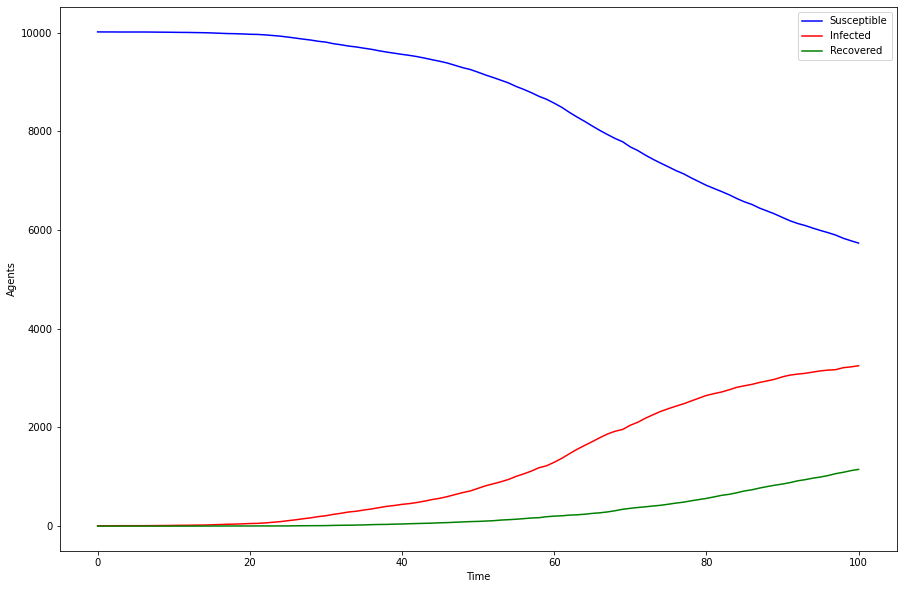

In [21]:
figure = plt.figure(figsize=(15,10))
plt.plot(S_t,'b', label = 'Susceptible')
plt.plot(I_t,'r', label = 'Infected')
plt.plot(R_t,'g', label = 'Recovered')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Agents')
plt.show()

In [8]:
edges = []
G = nx.Graph() #Initializes empty graph
for i in range(0,len(inlinks)): #Iterates over all nodes
    for j in inlinks[i]: #Goes over all neighbours of the node i
        G.add_edge(i,j) #Add the edge i-j
d = dict(G.degree)

In [9]:
for s in S_f:
    G.nodes[s]['state'] = 's'
for i in I_f:
    G.nodes[i]['state'] = 'i'
for r in R_f:
    G.nodes[r]['state'] = 'r'

In [15]:
for r in R_f:
    G.remove_node(r)

In [18]:
Gcc = sorted(nx.connected_components(G), key = len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(G0)

Graph with 103 nodes and 2523 edges


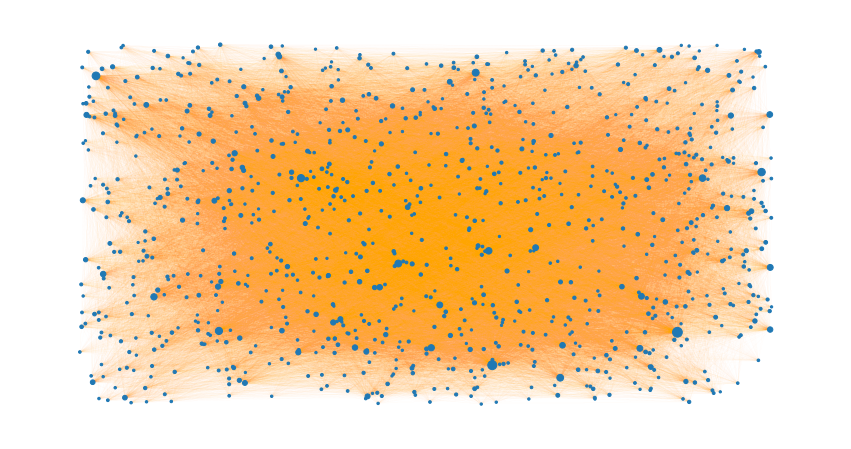

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
nx.draw_random(G,nodelist=d.keys(), node_size=[v*0.1 for v in d.values()],width = 0.01,edge_color = 'orange')